In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px


from sklearn.cluster import KMeans,DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
# load the dataset
data = pd.read_csv('cleaned_marketing.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
data = data[data['Income'] != ' ']
data.reset_index(drop =True, inplace=True)

In [5]:
# get age column
data['age'] = 2025 - data['Year_Birth']

# convert dt_customer to date data type
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# get lenght_customer column
data['customer_since'] = [2025 - x.year for x in data['Dt_Customer']]

#drop the irrelevant columns
data.drop(columns = ['ID','Dt_Customer','Year_Birth'], inplace=True)

In [6]:
# rename the education column
mappings = {
    'Graduation':'Bsc', 
    'PhD':'PhD', 
    'Master':'Msc', 
    'Basic':'Primary', 
    '2n Cycle':'Ssce'
}

data['Education'] = data['Education'].map(mappings)
data['Education'].unique()

array(['Bsc', 'PhD', 'Msc', 'Primary', 'Ssce'], dtype=object)

In [7]:
data['Marital_Status'] = ['single' if x in ['Single','Alone','Absurd', 'YOLO']
                          else x for x in data['Marital_Status']]
data['Marital_Status'].unique()

array(['single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [8]:
# encode the categorical variables
cleaned_data = data.copy()

encoder = LabelEncoder()
for col in ['Marital_Status','Education']:
    data[col] = encoder.fit_transform(data[col])
    
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,customer_since
0,0,4,58138,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,68,13
1,0,4,46344,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,71,11
2,0,2,71613,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,60,12
3,0,2,26646,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,41,11
4,2,1,58293,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,44,11


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education            2216 non-null   int32 
 1   Marital_Status       2216 non-null   int32 
 2   Income               2216 non-null   object
 3   Kidhome              2216 non-null   int64 
 4   Teenhome             2216 non-null   int64 
 5   Recency              2216 non-null   int64 
 6   MntWines             2216 non-null   int64 
 7   MntFruits            2216 non-null   int64 
 8   MntMeatProducts      2216 non-null   int64 
 9   MntFishProducts      2216 non-null   int64 
 10  MntSweetProducts     2216 non-null   int64 
 11  MntGoldProds         2216 non-null   int64 
 12  NumDealsPurchases    2216 non-null   int64 
 13  NumWebPurchases      2216 non-null   int64 
 14  NumCatalogPurchases  2216 non-null   int64 
 15  NumStorePurchases    2216 non-null   int64 
 16  NumWeb

In [10]:
data.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
age                    0
customer_since         0
dtype: int64

In [11]:
data['Income'] = pd.to_numeric(data['Income'])

### MODEL BUILDING

In [12]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,customer_since
0,0,4,58138,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,68,13
1,0,4,46344,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,71,11
2,0,2,71613,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,60,12
3,0,2,26646,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,41,11
4,2,1,58293,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,44,11


In [13]:
# decompose the dataset into 3 columns

scaler = StandardScaler()
columns = data.columns
scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=3)
columns = ['column1','column2','column3']
pca_data = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(data = pca_data, columns = columns)
pca_data.head()

,column1,column2,column3
0,3.859241,0.263741,-0.032500
1,-2.396511,-0.423049,-0.470450
2,1.641587,0.005173,-1.077170
3,-2.542591,-1.603501,0.008358
4,-0.535854,-0.347297,-0.709195


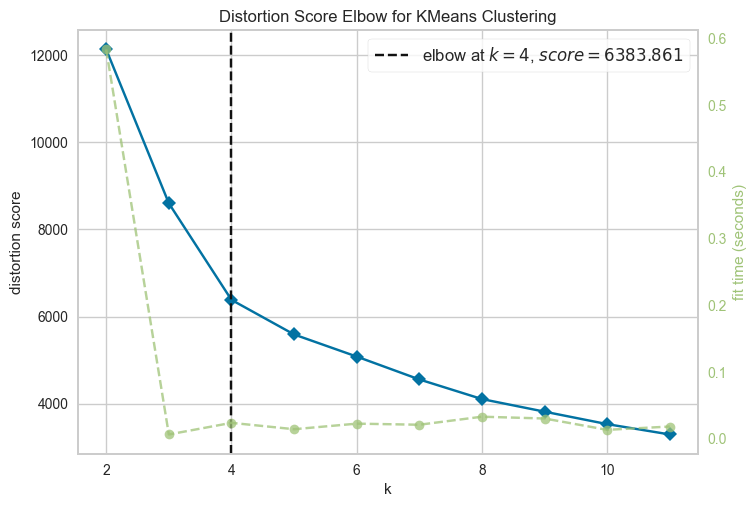

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(pca_data)        # Fit the data to the visualizer
visualizer.show()      

In [15]:
model = KMeans(random_state=23, n_clusters=4)
model.fit(pca_data)
clusters = model.labels_
clusters

array([0, 1, 0, ..., 3, 0, 1])

In [16]:
cleaned_data['cluster'] = [f'cluster_{x}' for x in clusters]

In [ ]:
px.scatter_3d(data_frame = pca_data, x='column1', y = 'column2',
              z= 'column3', color = clusters)

In [18]:
cleaned_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,customer_since,cluster
0,Bsc,single,58138,0,0,58,635,88,546,172,...,0,0,0,0,3,11,1,68,13,cluster_0
1,Bsc,single,46344,1,1,38,11,1,6,2,...,0,0,0,0,3,11,0,71,11,cluster_1
2,Bsc,Together,71613,0,0,26,426,49,127,111,...,0,0,0,0,3,11,0,60,12,cluster_0
3,Bsc,Together,26646,1,0,26,11,4,20,10,...,0,0,0,0,3,11,0,41,11,cluster_1
4,PhD,Married,58293,1,0,94,173,43,118,46,...,0,0,0,0,3,11,0,44,11,cluster_1


<Axes: xlabel='cluster', ylabel='Income'>

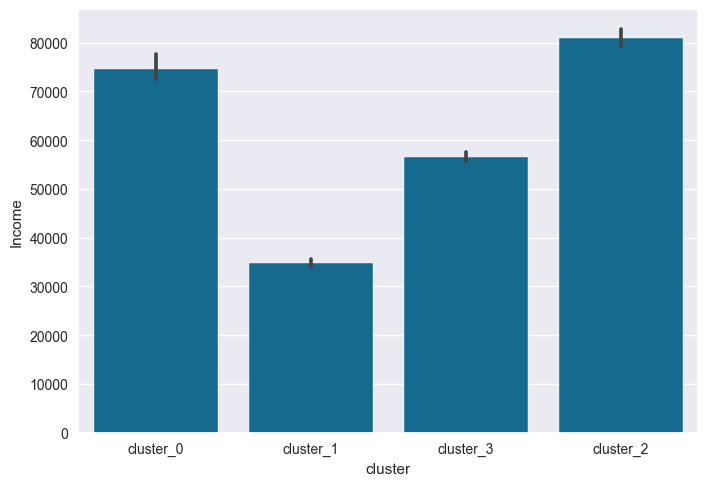

In [33]:
# inspect the cluster characteristics
sns.set_style('darkgrid')
cleaned_data['Income'] = pd.to_numeric(cleaned_data['Income'])

sns.barplot(data=cleaned_data, x = 'cluster', y ='Income')

<Axes: xlabel='cluster', ylabel='MntWines'>

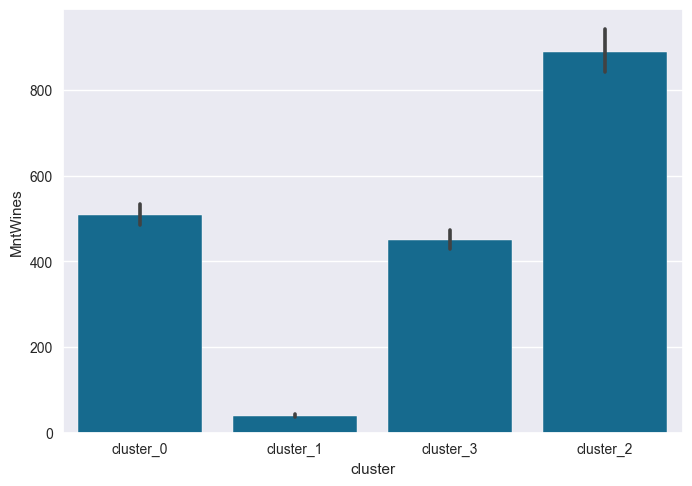

In [34]:
sns.barplot(data=cleaned_data, x = 'cluster', y ='MntWines')